In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 154.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [8]:
shopify = yf.Ticker("SHOP")

In [9]:
import yfinance as yf
import pandas as pd

# Question 1: Use yfinance to Extract Stock Data

# 1. Create a ticker object for Tesla (TSLA)
Tesla = yf.Ticker("TSLA")

# 2. Extract stock information for the maximum period and save it to a DataFrame
tesla_data = Tesla.history(period="max")

# 3. Reset the index using the reset_index(inplace=True) function
tesla_data.reset_index(inplace=True)

# 4. Display the first five rows of the tesla_data dataframe using the head function
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla Quarterly Revenue Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# 1. Fetch the HTML content
html_data = requests.get(url).text

# 2. Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# 3. Find the table (usually the second table on the page)
tables = soup.find_all('table')
for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_revenue_table = tables[index]
        break

# 4. Read the table into a pandas DataFrame
# The table headers are Date and Revenue
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tesla_revenue_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    if col:
        date = col[0].text
        revenue = col[1].text
        
        # Append the data to the DataFrame
        tesla_revenue.loc[len(tesla_revenue)] = [date, revenue]

# 5. Clean the Revenue data
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# 6. Convert Revenue to numeric type
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

# Now you can run the tail() function
print(tesla_revenue.tail())

          Date  Revenue
48  2010-09-30       31
49  2010-06-30       28
50  2010-03-31       21
52  2009-09-30       46
53  2009-06-30       27


In [16]:
import yfinance as yf
import pandas as pd

# Question 3: Use yfinance to Extract Stock Data

# 1. Create a ticker object for GameStop (GME)
GameStop = yf.Ticker("GME")

# 2. Extract stock information for the maximum period and save it to a DataFrame
gme_data = GameStop.history(period="max")

# 3. Reset the index using the reset_index(inplace=True) function
gme_data.reset_index(inplace=True)

# 4. Display the first five rows of the gme_data dataframe using the head function
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# --- Part 1: Web Scraping to Extract GME Revenue Data ---

# The URL containing GameStop (GME) historical revenue data.
# This link is a known data source used for this type of financial data extraction project.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# 1. Download the webpage content
try:
    html_data = requests.get(url).text
except requests.exceptions.RequestException as e:
    print(f"Error fetching data from URL: {e}")
    # Create an empty DataFrame structure in case of failure to proceed
    gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
    print("Created an empty DataFrame due to network error.")
    # Skip to the display part if fetching failed
    print("\nDisplaying the first 5 rows of the (empty/error) DataFrame:")
    print(gme_revenue.head())
    exit()

# 2. Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')

# 3. Extract the revenue table
# The quarterly revenue table is typically the second table on the page (index 1)
# We find the table by searching for all <table> tags and selecting the second one.
try:
    # Find the table containing the Quarterly Revenue data
    gme_table = soup.find_all('table')[1]
except IndexError:
    print("Could not find the expected revenue table structure.")
    gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
    print("\nDisplaying the first 5 rows of the (empty/error) DataFrame:")
    print(gme_revenue.head())
    exit()

# 4. Create the gme_revenue DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through all table rows (tr) within the table body (tbody)
for row in gme_table.find("tbody").find_all("tr"):
    col = row.find_all("td")
    if col:
        # The first column is Date, the second is Revenue
        date = col[0].text
        revenue = col[1].text

        # Append the data to the DataFrame
        new_row = pd.DataFrame([{'Date': date, 'Revenue': revenue}])
        gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# 5. Clean the Revenue data
# Remove dollar signs ($) and commas (,) from the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '')

# Remove null or empty strings
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Convert Revenue to a numeric type (float)
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# --- Part 2: Display the First 5 Rows ---

print("Successfully created the gme_revenue DataFrame containing GameStop Quarterly Revenue.")
print("\nDisplaying the first 5 rows (using .head()):")

# Display the first 5 rows of the final DataFrame
print(gme_revenue.head())

# --- Part 3: Display the Last 5 Rows (as originally requested) ---

print("\nDisplaying the last 5 rows (using .tail()) as per the initial request:")
# Display the last 5 rows of the final DataFrame
print(gme_revenue.tail())

Successfully created the gme_revenue DataFrame containing GameStop Quarterly Revenue.

Displaying the first 5 rows (using .head()):
         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548

Displaying the last 5 rows (using .tail()) as per the initial request:
          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


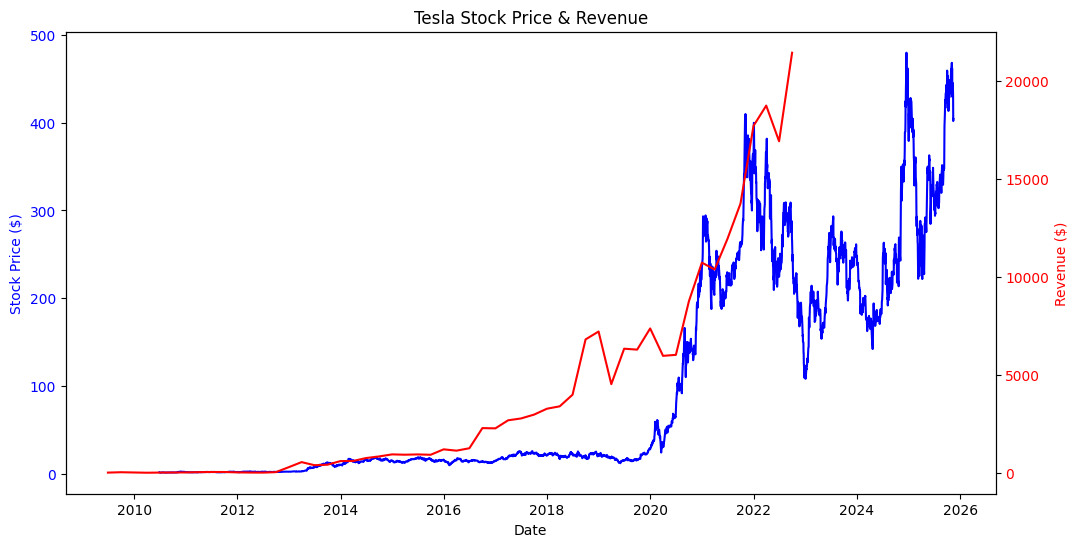

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, company_name):
    """Plot stock price and revenue of a company."""
    
    # Ensure Date columns are datetime objects without timezone
    stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.tz_localize(None)
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date']).dt.tz_localize(None)
    
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label='Revenue')
    ax2.set_ylabel('Revenue ($)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f'{company_name} Stock Price & Revenue')
    plt.show()

# Use it for Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')